# Predicting Students Maths Performance

## Table Of Contents
- [Introduction](#Introduction)
    - [Dataset Source](#DatasetSource)
    - [Dataset Details](#DatasetDetails)
    - [Dataset Variables](#DatasetVariables)
    - [Response Variable](#ResponseVariable)
    
- [Goals & Objectives](#Goals&Objectives)

- [Data Cleaning & Preprocesseing](#DataCleaning&Preprocesseing)

- [Data Exploration & Visualisation](#DataExploration&Visualisation)
    - [Literature Review](#LiteratureReview)
    
- [Summary & Conclusions](#Summary&Conclusions)

- [References](#References)

## Introduction <a id="Introduction"></a>

### Dataset Source <a id="DatasetSource"></a>

The dataset used in this study was obtained from Kaggle. This dataset includes the Maths grades of secondary school students in two Portuguese schools.

### Dataset Details <a id="DatasetDetails"></a>

This dataset is about the Final Math scores of secondary school students. In the dataset we have different features such as: the school of the students, the gender of the students, the age of students, the students home address, the students parents relationship status, the amount of time students study in a week, the number of classes the students had failed previously, the final Maths score achieved, and more. These features should be adequate for a linear regression problem on the students final scores.

The dataset has a total of 33 features (columns before dropping anything) and 395 observations (rows).

We will retrieve the dataset from our own devices by reading it since we have the csv file (the dataset) in the same folder as this jupyter notebook file.

In [79]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import requests
import io 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [80]:
# reading the csv file and naming it 'Maths_Scores'
Maths_Scores = pd.read_csv('Maths.csv')


In [81]:
Maths_Scores.sample(10, random_state=643)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
355,MS,F,18,U,GT3,T,3,3,services,services,course,father,1,2,0,no,yes,no,no,yes,yes,no,yes,5,3,4,1,1,5,0,10,9,9
50,GP,F,16,U,LE3,T,2,2,services,services,course,mother,3,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,2,3,4,2,12,13,13
265,GP,M,18,R,LE3,A,3,4,other,other,reputation,mother,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,2,5,3,4,1,13,17,17,17
263,GP,F,17,U,GT3,T,3,3,other,other,home,mother,1,3,0,no,no,no,yes,no,yes,no,no,3,2,3,1,1,4,4,10,9,9
375,MS,F,18,R,GT3,T,1,1,other,other,home,mother,4,3,0,no,no,no,no,yes,yes,yes,no,4,3,2,1,2,4,2,8,8,10
106,GP,F,15,U,GT3,T,2,2,other,other,course,mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,5,1,2,1,1,3,8,7,8,8
207,GP,F,16,U,GT3,T,4,3,teacher,other,other,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,1,3,2,1,1,1,10,11,12,13
349,MS,M,18,R,GT3,T,3,2,other,other,course,mother,2,1,1,no,yes,no,no,no,yes,yes,no,2,5,5,5,5,5,10,11,13,13
295,GP,M,17,U,GT3,T,3,3,health,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,4,3,1,3,5,4,14,12,11
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0


### Dataset Variables <a id="DatasetVariables"></a>

The variables or features we are going to use in our report are shown in the table below.

In [82]:
from tabulate import tabulate

Variable_table = [['Name','Data Type','Units','Description'],
                 ['school', 'Nominal categorical', 'NA', 'The school that the student attends (GP or MS)'],
                 ['sex', 'Nominal categorical', 'NA', 'The sex of the student (M/Male or F/Female)'],
                 ['age', 'Numerical', 'Years', 'Age of the student'],
                 ['studytime', 'Ordinal categorical', 'NA', 'Number for the category for the hours the student studies per week:\n 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours,\n or 4 - >10 hours'],
                 ['Medu', 'Ordinal categorical', 'NA', 'Highest level of mother\'s education: \n0 - none, 1 - primary education (4th grade), \n2 - 5th to 9th grade, \n3 - secondary education or 4 - higher education'],
                 ['Fedu', 'Ordinal categorical', 'NA', 'Highest level of father\'s education: \n0 - none, 1 - primary education (4th grade), \n2 - 5th to 9th grade, \n3 - secondary education or 4 - higher education'],
                 ['failures', 'Numerical', 'NA', 'Number of courses the student has failed previously: \nn if 0<=n<=3, else 4'],
                 ['schoolsup', 'Binary', 'NA', 'extra educational support'],
                 ['famsup', 'Binary', 'NA', 'family educational support'],
                 ['absences', 'Numerical', 'NA', 'Number of times the student was absent'],
                 ['famrel', 'Ordinal categorical', 'NA', 'Quality of family relationships (from 1 - very bad to 5 - excellent)'],
                 ['Pstatus', 'Nominal categorical', 'NA', 'Parent\'s cohabitation status (\'T\' - living together or \'A\' - apart)'],
                 ['G1', 'Numerical', 'Marks', 'first period grade (0 to 20)'],
                 ['G2', 'Numerical', 'Marks', 'second period grade (0 to 20)'],
                 ['G3', 'Numerical', 'Marks', 'Final Maths grade (0 - 20)']]


print(tabulate(Variable_table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤═════════════════════╤═════════╤══════════════════════════════════════════════════════════════════════╕
│ Name      │ Data Type           │ Units   │ Description                                                          │
╞═══════════╪═════════════════════╪═════════╪══════════════════════════════════════════════════════════════════════╡
│ school    │ Nominal categorical │ NA      │ The school that the student attends (GP or MS)                       │
├───────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────┤
│ sex       │ Nominal categorical │ NA      │ The sex of the student (M/Male or F/Female)                          │
├───────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────┤
│ age       │ Numerical           │ Years   │ Age of the student                                                   │
├───────────┼─────────────────────┼─────────┼───────────────────

### Response Variable <a id="ResponseVariable"></a>

The target variable for this report is 'G3' which is the final maths grade of the students. We will examine how the final maths grade changes based on the different explanatory variables.

## Goals & Objectives <a id="Goals&Objectives"></a>

When it comes to students' performance in school, there are a lot of factors that can affect their grades. We have decided to analyse a data set that presents the conditions that the students are under and how this may affect their grades. By doing this, we can see if certain conditions may improve the students' grades or even decrease their grades. Some of the conditions that were assessed includes, study time, absences, parents education, parents cohabitation status and more. By looking at the correlation between these conditions and their grades, we can see how students can improve their grades. 

Our main objectives are to see which conditions affect the students' grades the most and what conditions need to be changed in order for them to improve their grades. Another objective that we have is to predict what grades the students will get by looking at the conditions that they were in. 

We would assume that the amount of study time relates to the students' grade. However, this may not always be the case. This is why we need to factor in the rest of the conditions to be able to accurately predict the students' grades. 

## Data Cleaning & Preprocesseing <a id="DataCleaning&Preprocesseing"></a>

In [83]:
column_names = list(zip(*Variable_table))[0]
# https://stackoverflow.com/a/66389509/13298307
# store selected column in scores_df
scores_df = Maths_Scores.filter(column_names)
scores_df.head()

,school,sex,age,studytime,Medu,Fedu,failures,schoolsup,famsup,absences,famrel,Pstatus,G1,G2,G3
0,GP,F,18,2,4,4,0,yes,no,6,4,A,5,6,6
1,GP,F,17,2,1,1,0,no,yes,4,5,T,5,5,6
2,GP,F,15,2,1,1,3,yes,no,10,4,T,7,8,10
3,GP,F,15,3,4,2,0,no,yes,2,3,T,15,14,15
4,GP,F,16,2,3,3,0,no,yes,4,4,T,6,10,10


In [84]:
scores_df.columns = scores_df.columns.str.lower().str.strip()

columns_mapping = {
    'studytime': 'study_time',
    'schoolsup': 'school_sup',
    'famsup': 'fam_sup',
    'famrel': 'fam_rel',
    'pstatus': 'p_status'
}

# rename columns
scores_df = scores_df.rename(columns=columns_mapping)
scores_df.sample(5, random_state=999)

,school,sex,age,study_time,medu,fedu,failures,school_sup,fam_sup,absences,fam_rel,p_status,g1,g2,g3
123,GP,M,16,1,4,4,0,no,yes,18,3,T,14,11,13
151,GP,M,16,1,2,1,1,no,no,6,4,T,12,13,14
328,GP,F,17,3,4,4,0,no,yes,7,5,T,10,9,9
187,GP,M,16,2,2,1,0,no,no,0,4,T,15,15,15
156,GP,M,17,1,1,2,0,no,no,8,2,T,16,12,13


In [85]:
scores_df.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

In [86]:
scores_df.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

In [87]:
scores_df.p_status.value_counts(dropna=False)

T    354
A     41
Name: p_status, dtype: int64

In [88]:
# label encoding named column values
# https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/
# scores_df['school'] = scores_df['school'].map({"GP":0, "MS":1}) 


scores_df["school"] = scores_df["school"].replace("GP",0).replace("MS",1)
scores_df["sex"] = scores_df["sex"].replace("F",0).replace("M",1)
scores_df["p_status"] = scores_df["p_status"].replace("A",0).replace("T",1)
scores_df["school_sup"] = scores_df["school_sup"].replace("no",0).replace("yes",1)
scores_df["fam_sup"] = scores_df["fam_sup"].replace("no",0).replace("yes",1)
scores_df.head()

,school,sex,age,study_time,medu,fedu,failures,school_sup,fam_sup,absences,fam_rel,p_status,g1,g2,g3
0,0,0,18,2,4,4,0,1,0,6,4,0,5,6,6
1,0,0,17,2,1,1,0,0,1,4,5,1,5,5,6
2,0,0,15,2,1,1,3,1,0,10,4,1,7,8,10
3,0,0,15,3,4,2,0,0,1,2,3,1,15,14,15
4,0,0,16,2,3,3,0,0,1,4,4,1,6,10,10


In [89]:
scores_df.describe()

,school,sex,age,study_time,medu,fedu,failures,school_sup,fam_sup,absences,fam_rel,p_status,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,2.035443,2.749367,2.521519,0.334177,0.129114,0.612658,5.708861,3.944304,0.896203,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.839240,1.094735,1.088201,0.743651,0.335751,0.487761,8.003096,0.896659,0.305384,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,2.000000,4.000000,3.000000,0.000000,0.000000,1.000000,8.000000,5.000000,1.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,75.000000,5.000000,1.000000,19.000000,19.000000,20.000000


In [90]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   study_time  395 non-null    int64
 4   medu        395 non-null    int64
 5   fedu        395 non-null    int64
 6   failures    395 non-null    int64
 7   school_sup  395 non-null    int64
 8   fam_sup     395 non-null    int64
 9   absences    395 non-null    int64
 10  fam_rel     395 non-null    int64
 11  p_status    395 non-null    int64
 12  g1          395 non-null    int64
 13  g2          395 non-null    int64
 14  g3          395 non-null    int64
dtypes: int64(15)
memory usage: 46.4 KB


In [91]:
print(scores_df.isnull().sum())

school        0
sex           0
age           0
study_time    0
medu          0
fedu          0
failures      0
school_sup    0
fam_sup       0
absences      0
fam_rel       0
p_status      0
g1            0
g2            0
g3            0
dtype: int64


All the min and max values of the selected column are in correct range so we don't have any outliers in the data.

## Data Exploration & Visualisation <a id="DataExploration&Visualisation"></a>

Since, we have cleared and preprocessed our data according to our goal now we are going to explore and visualise the important features of the dataset.

## Univariate visualisation of important variables

### Histogram of studytime of students

As we can see from the histogram below, 2 hours is the most comman studytime among students.

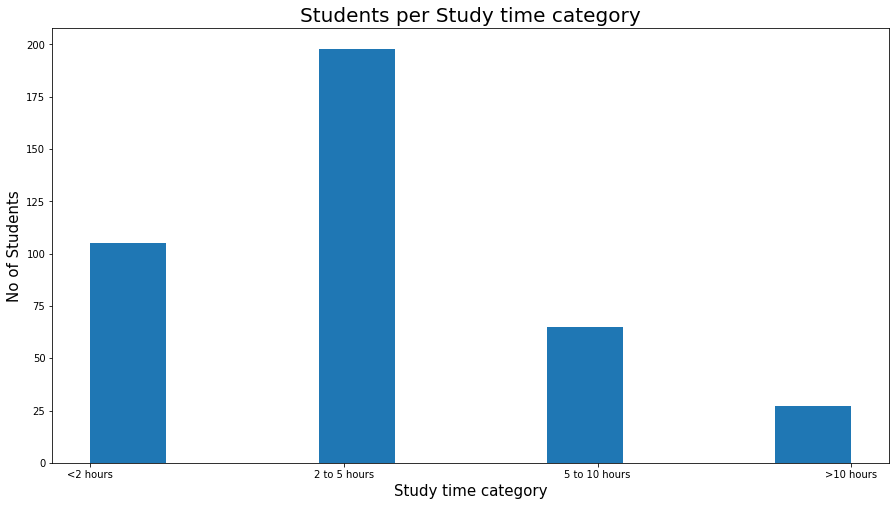

In [168]:
plt.figure(figsize = (15, 8))
data = scores_df['study_time']
sns.histplot(data)

plt.xticks(range(1,5), ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"])
plt.ylabel('No of Students', fontsize = 15)
plt.xlabel('Study time category', fontsize = 15)
plt.title('Students per Study time category', fontsize = 20)
plt.show()

### Boxplot of Students  Maths Grades

As we can see from the boxplots of math grades throughout term1, term2 and term3,  the median math grade of the class has roughly been between 10 and 11.

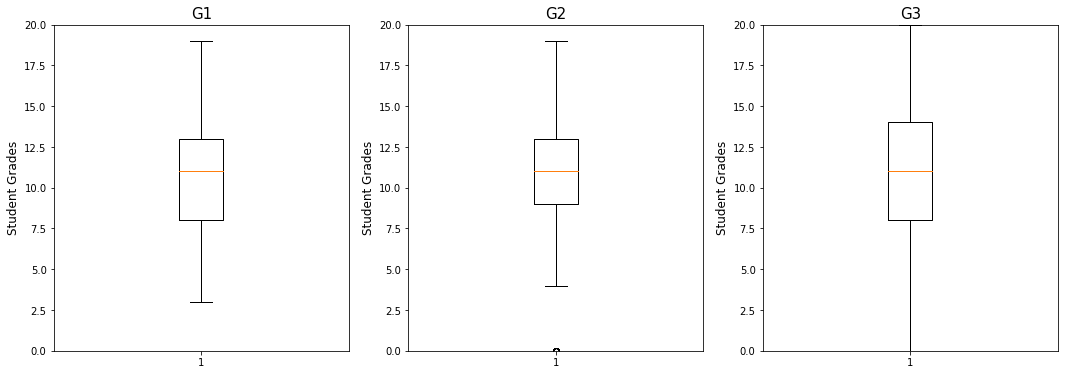

In [93]:
plt.figure(figsize = (18, 6))

plt.subplot(1, 3, 1)
plt.ylim(0, 20)
plt.boxplot(x = scores_df.g1)
plt.ylabel('Student Grades', fontsize = 12)
plt.title('G1', fontsize = 15)

plt.subplot(1, 3, 2)
plt.ylim(0, 20)
plt.boxplot(x = scores_df.g2)
plt.ylabel('Student Grades', fontsize = 12)
plt.title('G2', fontsize = 15)

plt.subplot(1, 3, 3)
plt.ylim(0, 20)
plt.boxplot(x = scores_df.g3)
plt.ylabel('Student Grades', fontsize = 12)
plt.title('G3', fontsize = 15)

plt.show()

### Pie chart of relativie proportion of Male vs Female in the class

As we can see from the pie chart there is a relative equal distribution of Male vs Female students in the class.

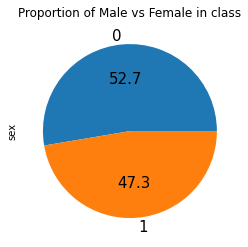

In [94]:
scores_df['sex'].value_counts().plot(kind= 'pie', autopct='%.1f', title = 'Proportion of Male vs Female in class', fontsize = 15)
plt.show();

### Histogram of absences of students

As we call see from the histogram below, most of the students have less than 10 days of absence.

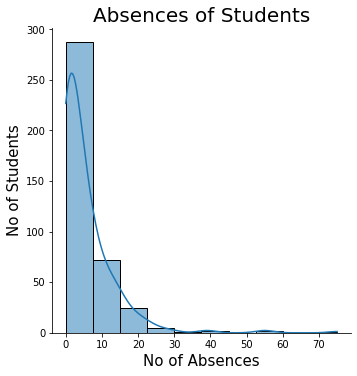

In [95]:
sns.displot(scores_df['absences'], kde = True, bins = 10)
plt.title('Absences of Students', fontsize = 20)
plt.xlabel('No of Absences', fontsize = 15)
plt.ylabel('No of Students', fontsize = 15)
plt.show();

### Barchart of parents level of education

Below, is are barcharts representing the level of education of each parent separately, we can see from the graph that most of the students have parents who have education upto middle grade or above(i.e 2 or above).

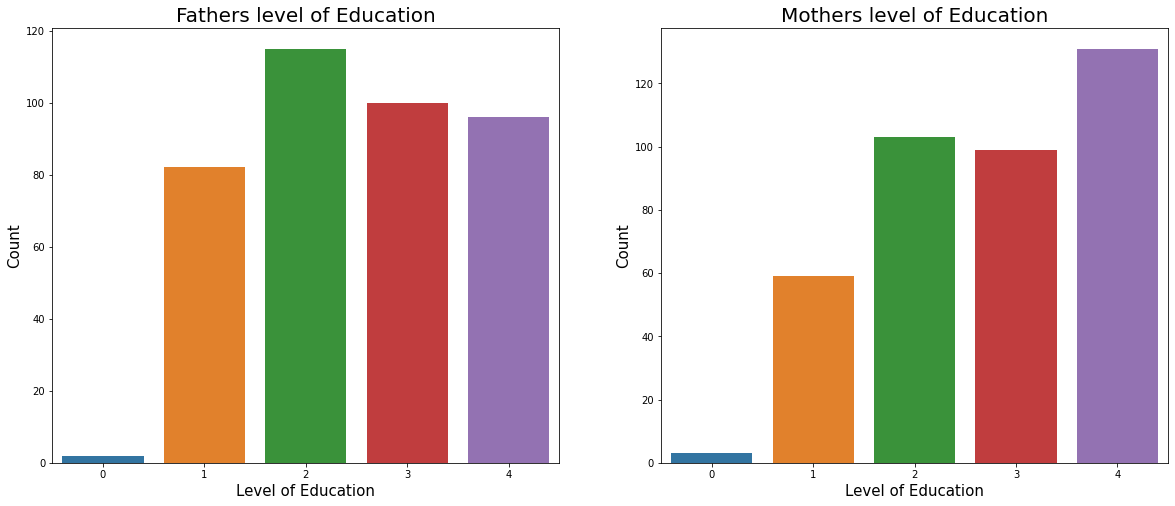

In [96]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.countplot(x = 'fedu', data = scores_df)
plt.xlabel('Level of Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Fathers level of Education', fontsize = 20)

plt.subplot(1, 2, 2)
sns.countplot(x = 'medu', data = scores_df )
plt.xlabel('Level of Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Mothers level of Education', fontsize = 20)

plt.show();

### Pie chart representing the proportion of students in proportion to the number of courses they failed

From the pie chart given below we can see that nearly 79 percent of students haven't failed in even a single course.

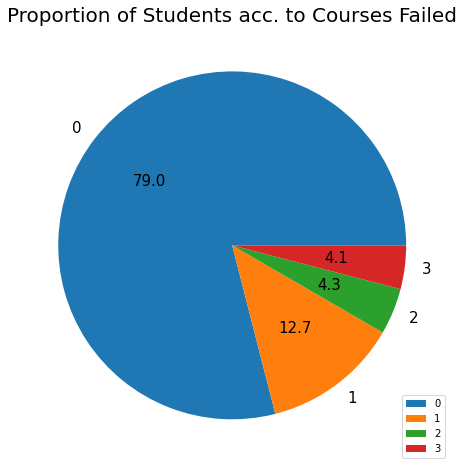

In [146]:
plt.figure(figsize = (12, 8))
scores_df['failures'].value_counts().plot(kind= 'pie', autopct='%.1f', fontsize = 15, )
plt.title('Proportion of Students acc. to Courses Failed', fontsize = 20)
plt.ylabel('')
plt.legend(loc ='lower right')
plt.show();

g3


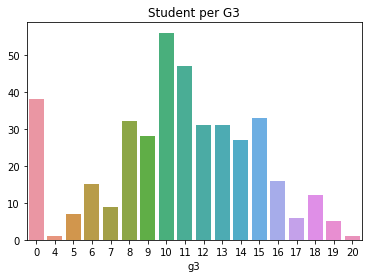

failures


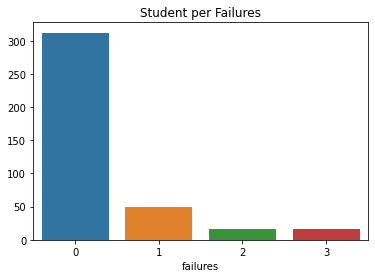

absences


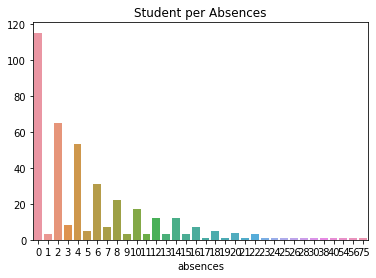

fam_rel


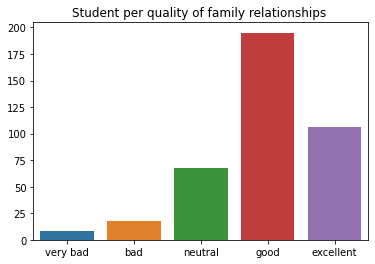

p_status


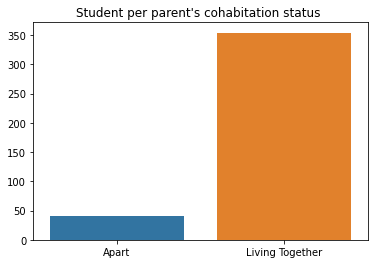

In [142]:
plot_cols = ["g3", "failures","absences","fam_rel","p_status"]
for col in plot_cols:
    print(col)
    size_series = scores_df.groupby([col]).size()
    x_labels = size_series.index
    title = f"Student per {col.capitalize()}"
    if col == "fam_rel":
        title = "Student per quality of family relationships "
        x_labels = ["very bad", "bad", "neutral", "good", "excellent"]
    elif col == "p_status":
        title = "Student per parent's cohabitation status "
        x_labels = ["Apart","Living Together"]
    sns.barplot(x=x_labels, y=size_series)
    # ax = scores_df.groupby([col]).size().plot(kind = "bar")
    plt.title(title)
    plt.show()

## Two-Variable Visualisaiton  of goal-oriented data comparisions

Now, we'd like to show you some interesting two-variable visualisation of the dataset.

### Boxplot of Students Marks broken according to gender

As we can see from boxplot below, that Male students have a slightly higher score compared to the Female students.

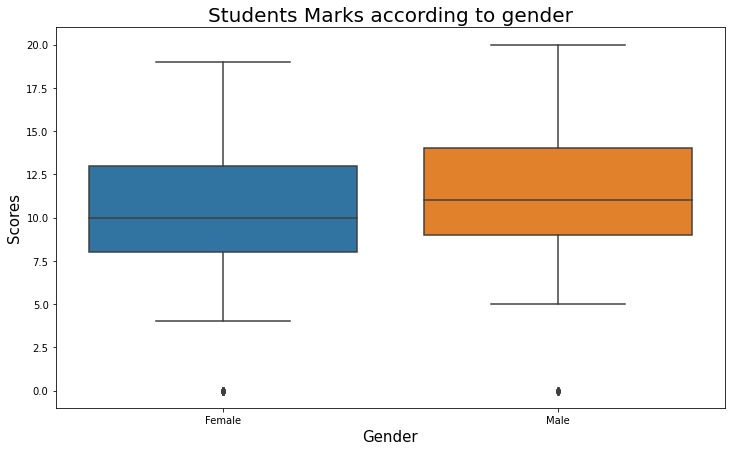

In [161]:
#FIX ME: Replace G3 with Avg if created

plt.figure(figsize = (12, 7))
sns.boxplot(x = 'sex', y = 'g3', data = scores_df)
plt.title('Students Marks according to gender', fontsize = 20)
plt.xticks(range(2), ["Female", "Male"])
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show();

### Boxplots of Marks compared to Study time

As we can clearly see from the boxplots below that students who tend to dedicate more hours for studies tend to score more marks.

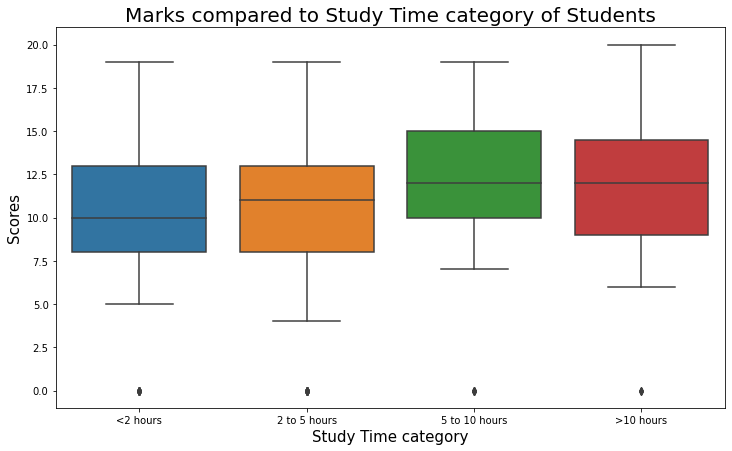

In [160]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'study_time', y = 'g3', data = scores_df)
plt.title('Marks compared to Study Time category of Students', fontsize = 20)

plt.xticks(range(4), ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"])
plt.xlabel('Study Time category', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show();


## Scatterplot to compare marks of students to the no. of absences

As we can see from the scatterplot that a student who has more No. of absences is more likely to score less.

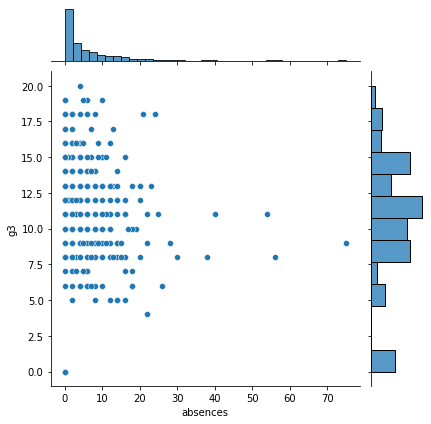

In [100]:
#FIX ME: Replace G3 with Avg if created

sns.jointplot(x="absences", y="g3", data=scores_df);
plt.show();

## Boxplot to compare Student marks to quality of family relationship

From the give Boxplot we can clearly see tehre is no significant difference between the marks a student obtains and the quality of their family relationships.

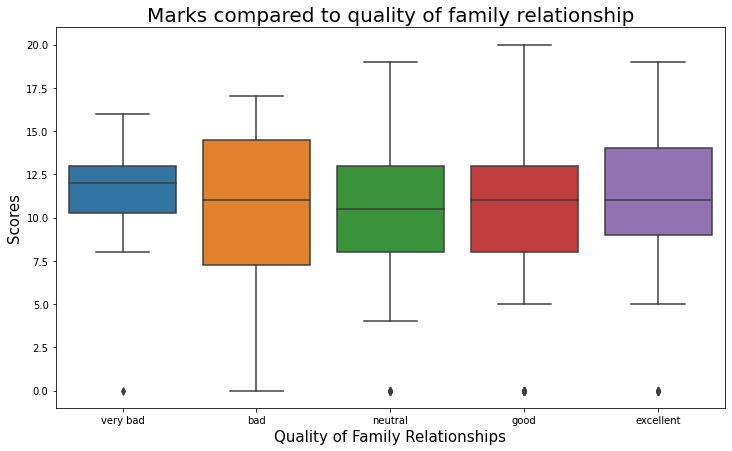

In [154]:
#FIX ME: Replace G3 with avg if created
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'fam_rel', y = 'g3', data = scores_df)
plt.xticks(range(5), ["very bad", "bad", "neutral", "good", "excellent"])
plt.title('Marks compared to quality of family relationship', fontsize = 20)
plt.xlabel('Quality of Family Relationships', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show();


## Line chart to compare the performance of students based on their School

We can deduce from the graph below that there is no significant difference between performance of students from both the schools.

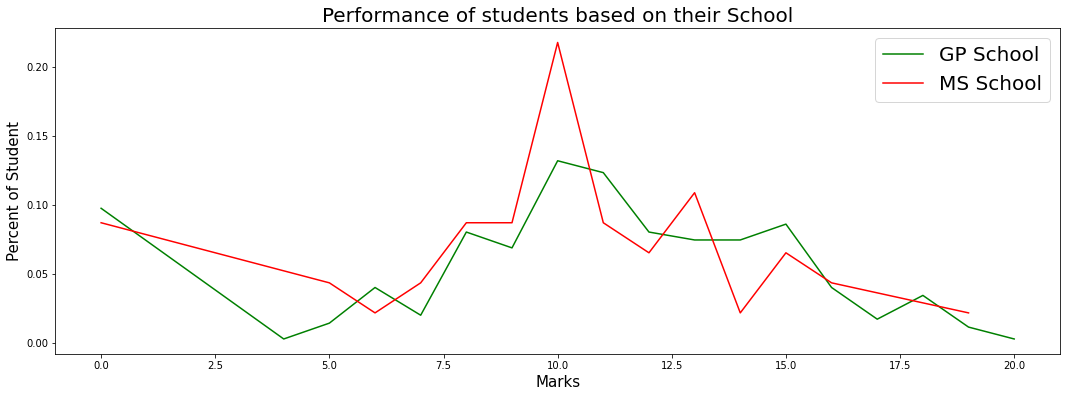

In [102]:
#FIX ME: Replace G3 with average if created
No_Std_GP = scores_df[scores_df['school'] == 0]['g3'].shape[0] # GP school data
No_Std_MS = scores_df[scores_df['school'] == 1]['g3'].shape[0] # MS school data

data_GP = scores_df[scores_df['school'] == 0]['g3'].value_counts().sort_index()/No_Std_GP
data_MS = scores_df[scores_df['school'] == 1]['g3'].value_counts().sort_index()/No_Std_MS

plt.figure(figsize = (18, 6))
plt.plot(data_GP, color = 'green',label = "GP School")
plt.plot(data_MS, color = 'red',label = "MS School")

plt.title("Performance of students based on their School", fontsize = 20)
plt.xlabel("Marks", fontsize = 15)
plt.ylabel("Percent of Student", fontsize = 15)
plt.legend(loc = 'upper right', fontsize = 20)

plt.show();

## Histogram to compare marks of students with and without extra educational support from their families or school

It can be clearly deduced that a larger proportion of students who don't have extra educational support from their family or school tend to do achieve more marks.

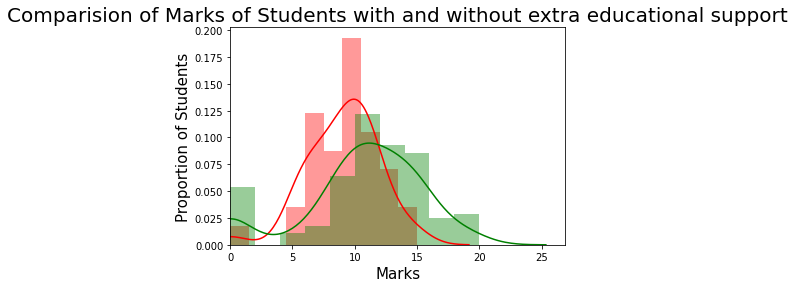

In [103]:
#FIX ME: Replace G3 with Avg if created

data_sup  = scores_df[(scores_df['fam_sup'] == 1) & (scores_df['school_sup'] == 1)]['g3']
sns.distplot(data_sup, kde = True, bins = 10, color = 'r')

data_nosup  = scores_df[(scores_df['fam_sup'] == 0) & (scores_df['school_sup'] == 0)]['g3']
sns.distplot(data_nosup, kde = True, bins = 10, color = 'g')

plt.xlim(0, None)
plt.title('Comparision of Marks of Students with and without extra educational support', fontsize = 20)
plt.xlabel('Marks', fontsize = 15)
plt.ylabel('Proportion of Students', fontsize = 15)
plt.show();

## Three-Variable Visualisation

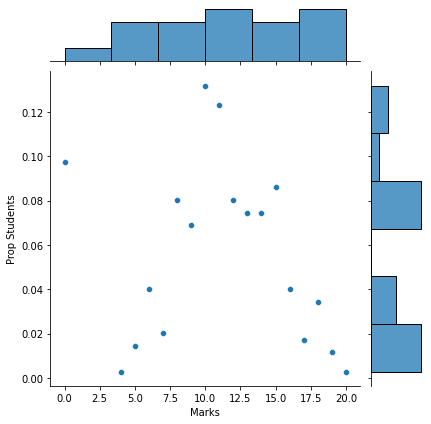

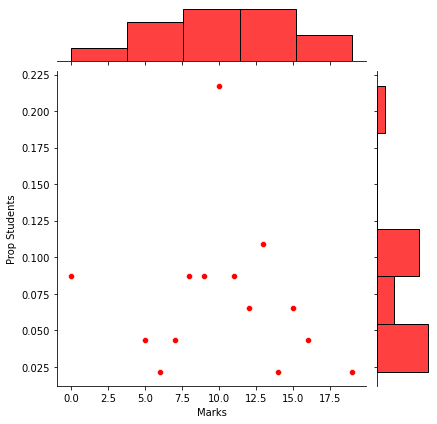

In [104]:
#FIX ME: Replace G3 with Avg if created
No_Std_GP = scores_df[scores_df['school'] == 0]['g3'].shape[0]
No_Std_MS = scores_df[scores_df['school'] == 1]['g3'].shape[0]

data_GP = scores_df[scores_df['school'] == 0]['g3'].value_counts().sort_index()/No_Std_GP
data_MS = scores_df[scores_df['school'] == 1]['g3'].value_counts().sort_index()/No_Std_MS

new_data_GP = pd.DataFrame({'Prop Students': data_GP, 'Marks': data_GP.index.tolist()})
new_data_MS = pd.DataFrame({'Prop Students': data_MS, 'Marks': data_MS.index.tolist()})

sns.jointplot(x = 'Marks', y = 'Prop Students', data = new_data_GP)
sns.jointplot(x = 'Marks', y = 'Prop Students', data = new_data_MS, color = 'red')
plt.show();

## Scatterplot of G3 grades by parents education level and parents gender

It is clear from the figure below that the level of parents education does not affect the grades of their children.

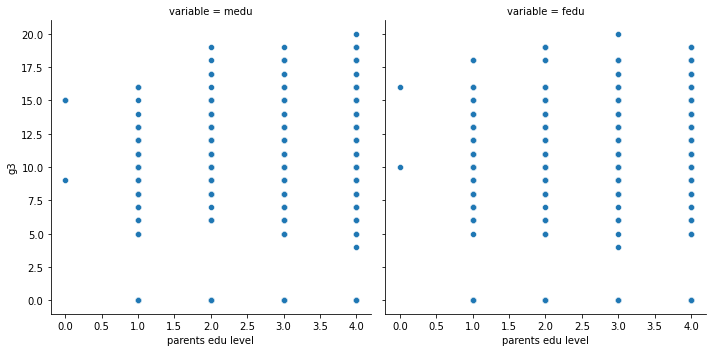

In [120]:
dfm = scores_df.melt(id_vars=['g3'],value_vars=['medu','fedu'], value_name='parents edu level')
p=sns.relplot(x='parents edu level',
            y='g3',
            col='variable',
            data=dfm);


## Bloxplot of Grades against Term and Gender of Students

As we can see that male students have performed better than female students in every term.

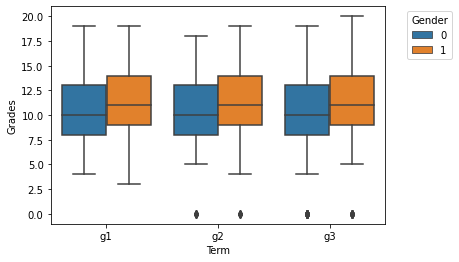

In [121]:
df = scores_df.copy(deep=True)
dfm=df.melt(id_vars=["sex"],value_vars=["g1","g2","g3"],var_name="Term",value_name="Grades")
#dfm.replace('M',1,inplace=True)
#dfm.replace('F',0,inplace=True)
p=sns.boxplot(x="Term",
              y="Grades",
              hue="sex",
              data=dfm);
p.legend(bbox_to_anchor=(1.05,1),loc=2,title="Gender");


## Scatterplot of studytime against age and gender of students

It is clear from the scatter plot below that average of female students is less than the average of male students.Also younger students tend to spen less time on study as compared to older students.

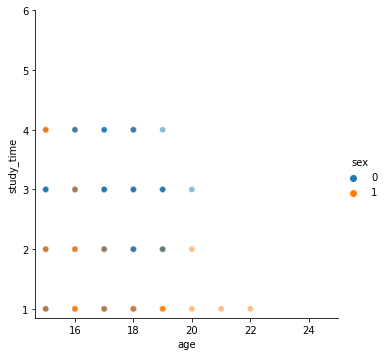

In [122]:
sns.relplot(x="age",
            y="study_time",
            hue="sex",
            alpha=0.5,
            data=scores_df);
plt.xlim(None,25);
plt.ylim(None,6);

## Historgram of Number of Students to Family Relation and Family Support

Students that have better family relation tend to get more family support when it comes to their studies.

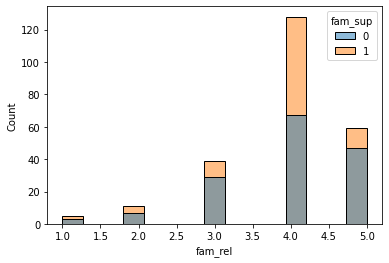

In [123]:
p=sns.histplot(x='fam_rel',
             hue='fam_sup',
             data=scores_df);


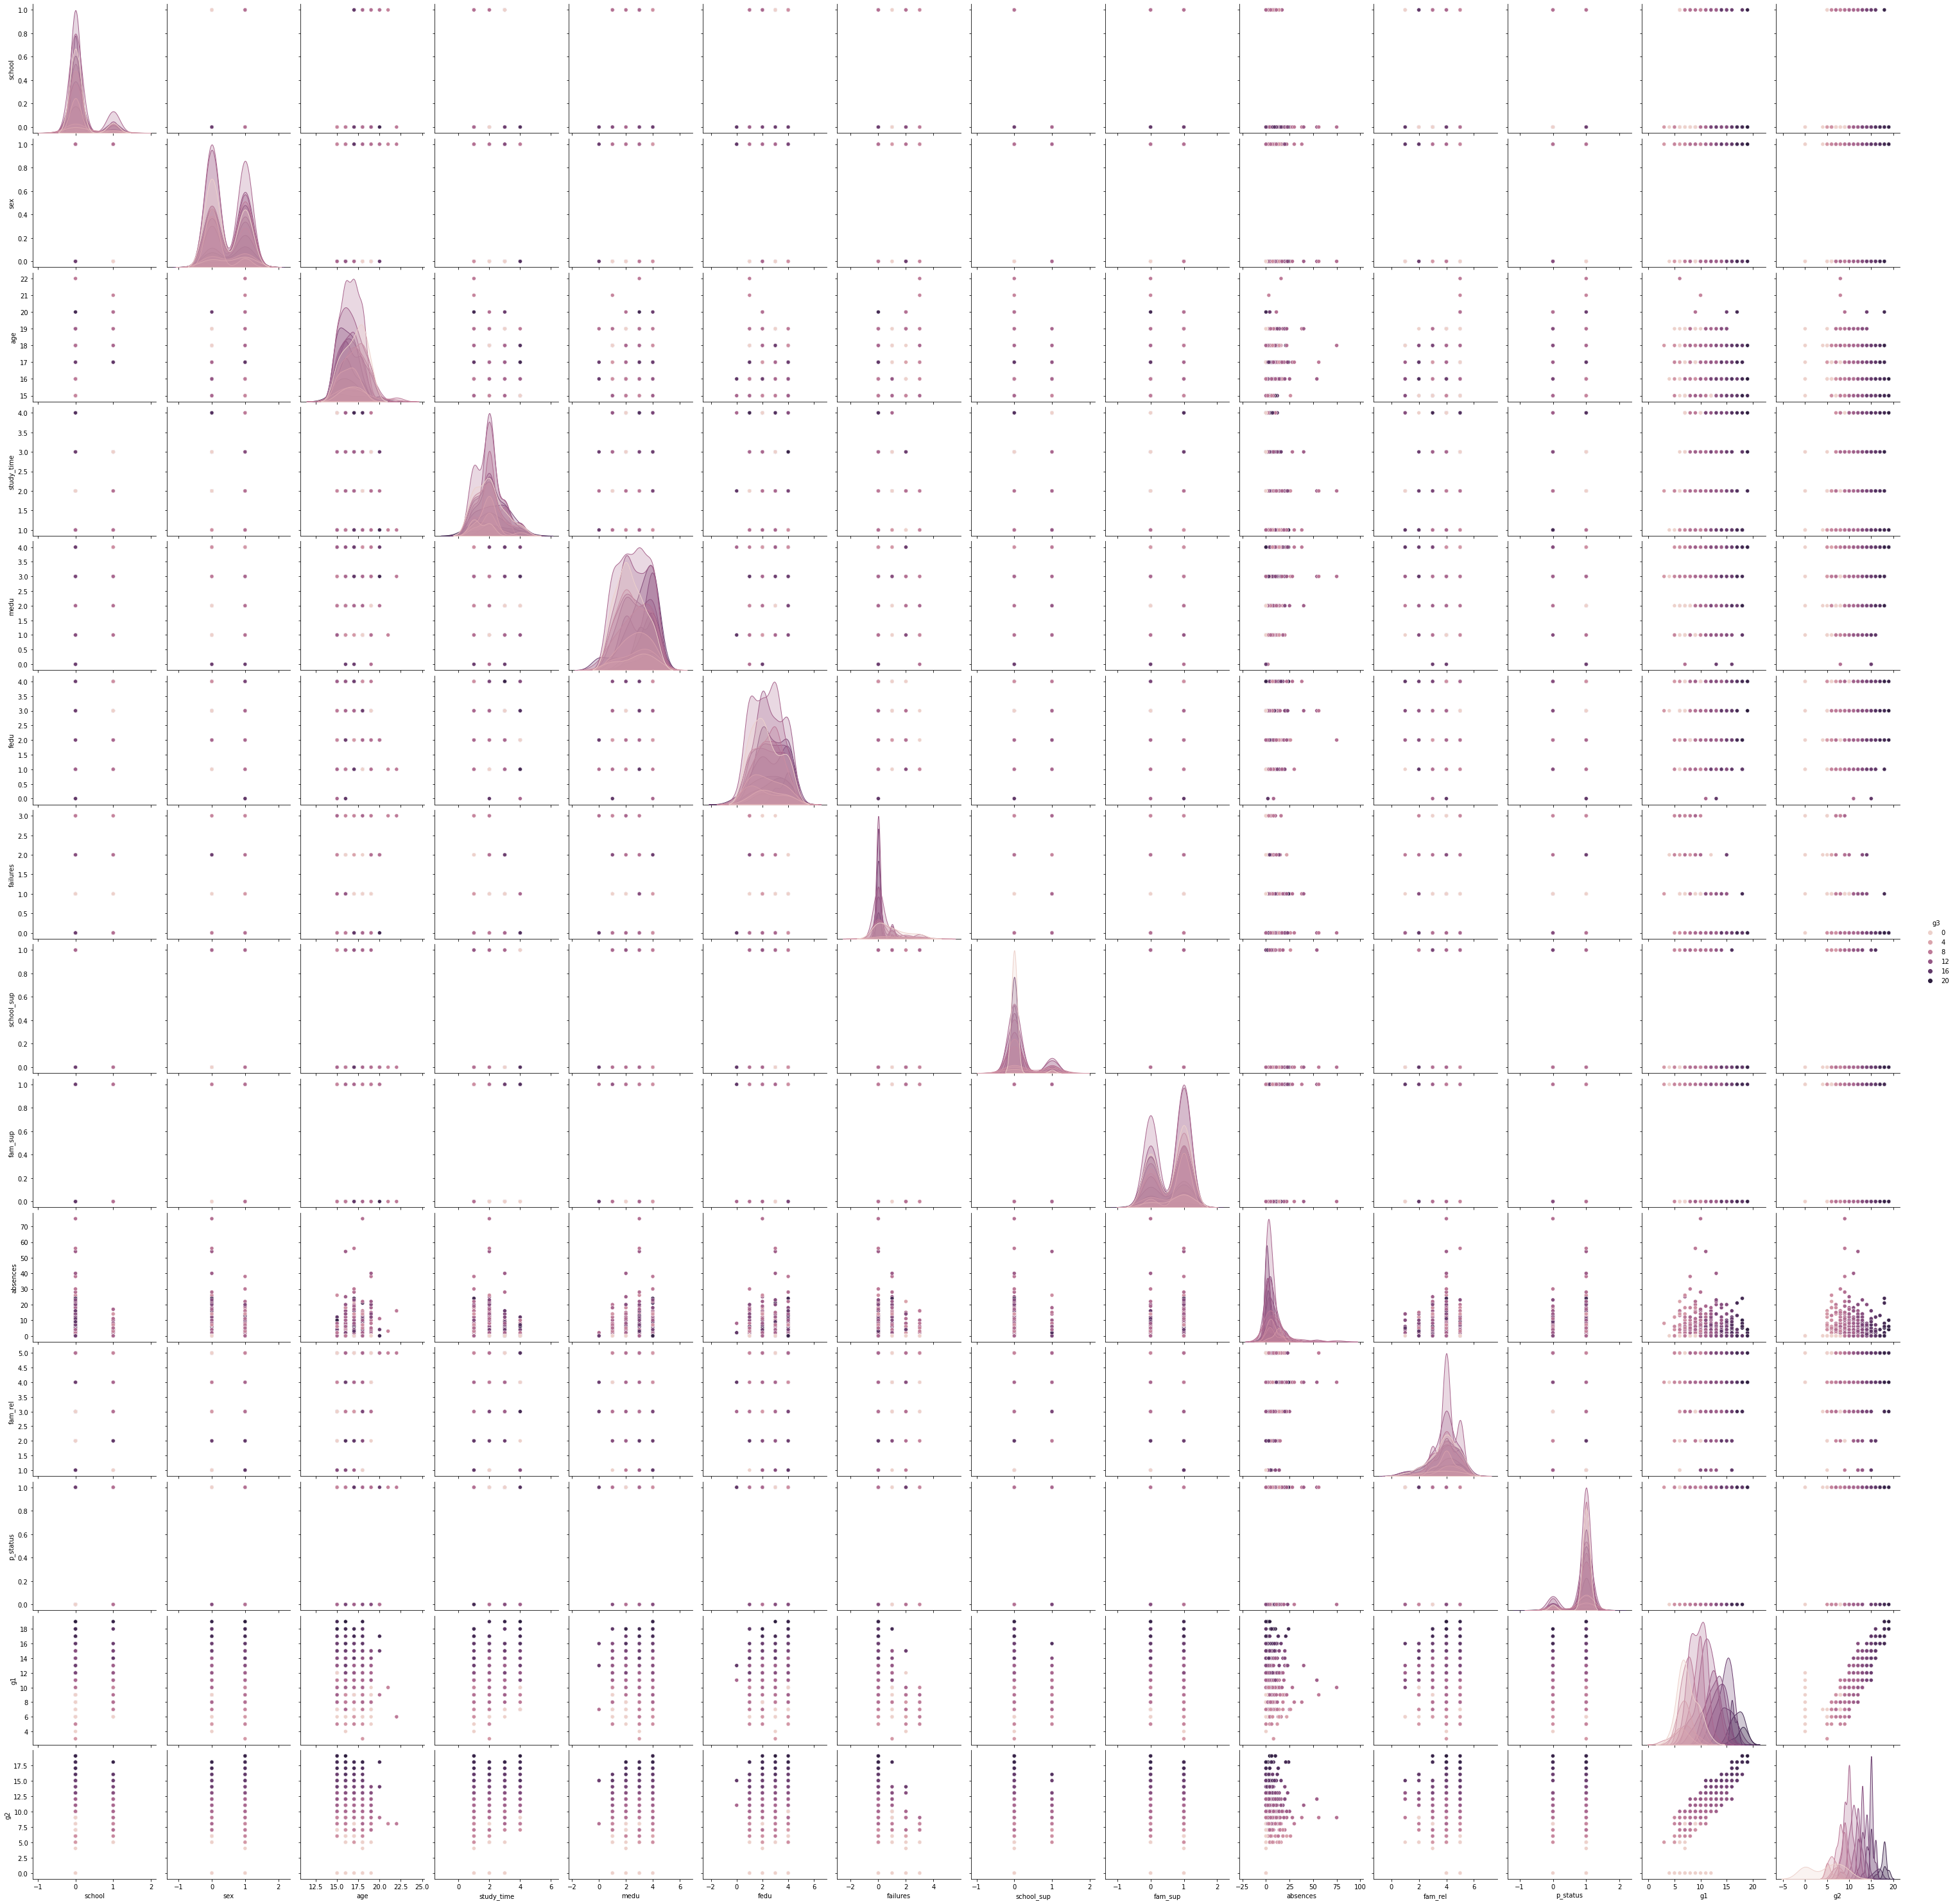

In [75]:
sns.pairplot(scores_df, hue="g3", size=3);
plt.show()

### Literature Review <a id="LiteratureReview"></a>

## Summary & Conclusions <a id="Summary&Conclusions"></a>

Predicting a student’s grades requires analyzing and establishing associations between quite a lot of factors or variables. Studying these associations and predictions can help improve the education system in many ways. It is very important for teachers to be aware of what factors improve or negatively  affect the grades of students.The objective of our project is to study our dataset for factors affecting the grades of the students and try to predict their final grades.

We have started this project by performing some data cleaning and preprocessing. The dataset we worked on was mostly clean and ready to work with. All we did was filter the columns which we wanted to work on and rename some of the columns that were left to something that is more readable. We also checked for any missing values and luckily there were none. We then label encoded some of the features values to make them easier for us to work with.

Another important part of phase 1 of our project is data visualizations.With the help of libraries like matplotlib and seaborn we have plot some graphs to better analyze our dataset.Form our graphs we can clearly see that most of the students have missed less than 10 classes. The few students who have missed classes often have performed poorly as compared to the rest of the class. We have also observed that the parents' level of education has not affected the grades obtained by their children. Despite having a lower proportion, more number of male students have achieved good grades.

We have successfully been able to process our data and remove outliers.We have also established some associations between various attributes and our target variable.However, we need more analysis to establish some causations and make some predictions.


## References <a id="References"></a>

- kaggle.com. (n.d.). Student performance in Maths. [online] Available at: https://www.kaggle.com/code/parvinderkaur21/student-performance-in-maths/data [Accessed 29 Sep. 2022].

- Using Seaborn To Visualize A pandas Dataframe. [online] Available at: https://chrisalbon.com/code/python/data_wrangling/pandas_with_seaborn/ [Accessed 2 Oct. 2022].